# Determinacion Constnte de Rydberg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('hidrogeno.csv')

# Calculo de $\lambda$


In [2]:
grad =  np.pi/180
np.sin(90 * grad)

lpm = 600000 # 6000 lin / cm = 600000 lin / 

In [3]:
def lambdda(m, ang, bias = 0):
    """
    ang: angulo en grados
    m: orden
    asume bias hacia la izquierda, osea que si tengo 2 grados de bias, al medir 
    2 grados hacia la derecha, estoy midiendo 0
    """

    d = 1/lpm
    lam= d*np.sin(np.abs(ang - bias)* np.pi/180)/m
    print(str(lam * 10**9) + " [nm]")
    return lam * 10**9

In [4]:
df['promedio'] = (df['theta_der'] + df['theta_izq'])/2

In [13]:

df['lambda'] = lambdda(df.orden ,df[df['orden']==df.orden]['promedio'])

0    421.522913
1    443.995580
2    499.789017
3    669.912961
4    439.129830
5    493.930215
6    669.880717
dtype: float64 [nm]


In [14]:
df['color'] = ['violeta','violeta', 'celeste', 'rojo','violeta','celeste','rojo']

In [16]:
df

,theta_der,theta_izq,orden,promedio,lambda,color
0,14.4,14.9,1,14.65,421.522913,violeta
1,15.4,15.5,1,15.45,443.995580,violeta
2,17.4,17.5,1,17.45,499.789017,celeste
3,23.4,24.0,1,23.70,669.912961,rojo
4,31.9,31.7,2,31.80,439.129830,violeta
5,36.2,36.5,2,36.35,493.930215,celeste
6,53.4,53.6,2,53.50,669.880717,rojo


In [17]:
df.to_csv('hidrogeno_lambdas.csv')

# Calcula $R_H$
Serie de Balmer inversa

$$
\frac{1}{\lambda} = R_H  (\frac{1}{2^2} - \frac{1}{n^2})
$$

$$
R_H = \frac{1}{\lambda} (\frac{4 n ^2}{n^2 - 4}) = 10 973 731.6 [m^{-1}]
$$

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

realR = 10973731.6 # rydberg constante R_\infty
realRh = 1.09678 * 10**7

# serie de balmer
def Rh(lambdad, n):
    longitudvacio = 1.00027717 * lambdad
    rh = (4*n*n)/(longitudvacio * (n*n - 4)) # 10**-9 [1/m]
    return rh * 10**9 # lo retorna en # [1/m]

In [22]:
datahidro = pd.read_csv('hidrogeno_lambdas.csv', index_col=0)
datahidro

,theta_der,theta_izq,orden,promedio,lambda,color
0,14.4,14.9,1,14.65,421.522913,violeta
1,15.4,15.5,1,15.45,443.995580,violeta
2,17.4,17.5,1,17.45,499.789017,celeste
3,23.4,24.0,1,23.70,669.912961,rojo
4,31.9,31.7,2,31.80,439.129830,violeta
5,36.2,36.5,2,36.35,493.930215,celeste
6,53.4,53.6,2,53.50,669.880717,rojo


In [29]:
# Hidrogeno rojo 3->2
Rh3_2 = Rh(datahidro['lambda'][3],3)

# Hidrogeno azul verde 4->2
Rh4_2 = Rh(datahidro['lambda'][2],4)

# Hidrogeno violeta 5->2
Rh5_2 = Rh(datahidro['lambda'][1],5)

# Hidrogeno violeta 6->2
Rh6_2 = Rh(datahidro['lambda'][0],6)

In [71]:
rhdf = pd.DataFrame({
    'E0': [3,4,5,6],
    'Rh': [Rh3_2, Rh4_2, Rh5_2, Rh6_2],
})

rhdf['error_percent'] = 100 *  (rhdf.Rh - realRh)/ realRh

rhdf

,E0,Rh,error_percent
0,3,1.074469e+07,-2.034257
1,4,1.066821e+07,-2.731517
2,5,1.072215e+07,-2.239778
3,6,1.067262e+07,-2.691350


# Plot de Rh para el Hidrogeno

In [72]:
import seaborn as sns

In [137]:
rhdf = [10668212.633, 10672618.12, 10722145.627, 10744686.76]
np.mean(rhdf)

10701915.785

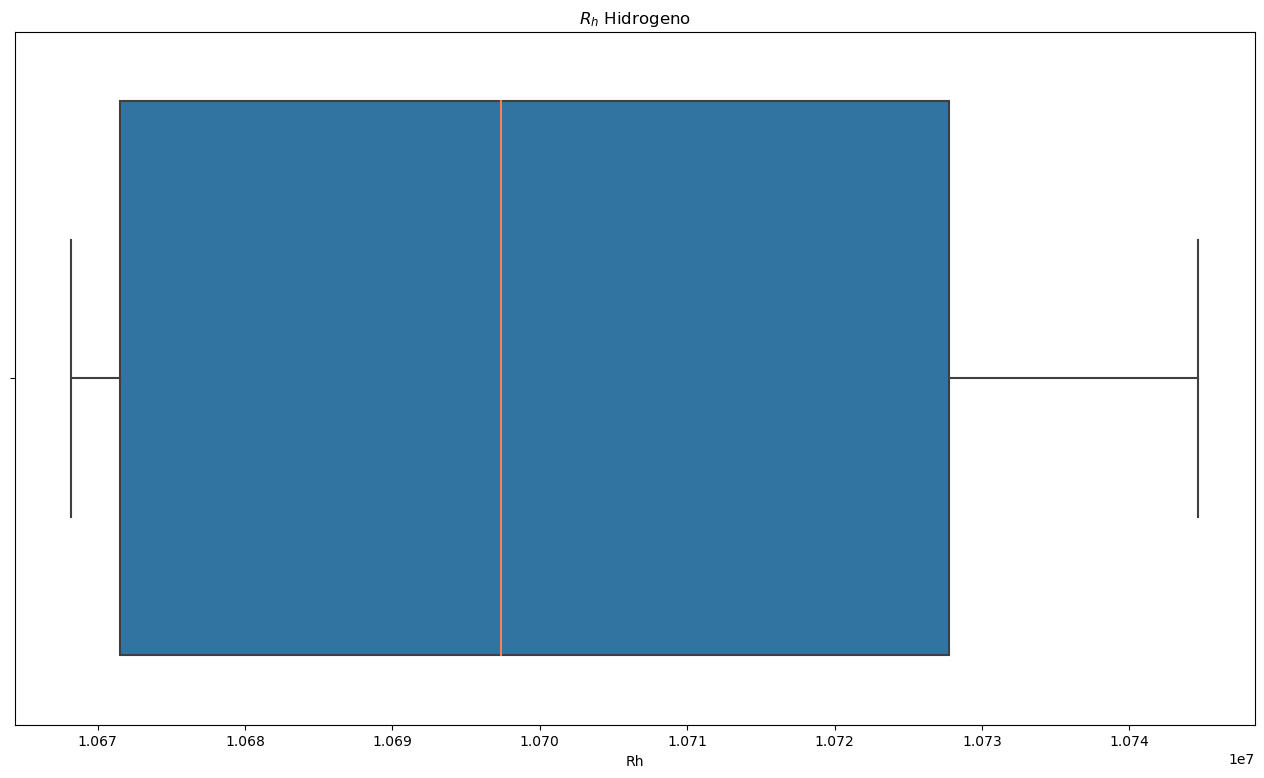

In [73]:
fig, ax = plt.subplots(figsize=(16,9))
plt.title(r'$R_h$ Hidrogeno')
sns.boxplot(
    x=rhdf.Rh, ax=ax, medianprops={"color": "coral"}
    )
plt.show()

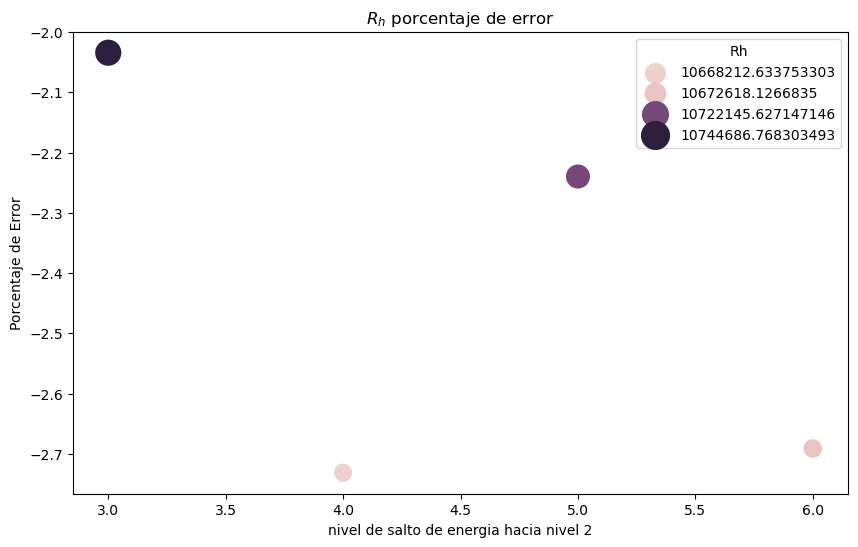

In [74]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title(r'$R_h$ porcentaje de error')
sns.scatterplot(
    ax=ax, data=rhdf,
    y="error_percent", x="E0", size="Rh", sizes= (200,400), hue="Rh"
    )
ax.set_xlabel("nivel de salto de energia hacia nivel 2")
ax.set_ylabel("Porcentaje de Error")
plt.show()

# Analisis Comparativo
Utilizando la constante de Rydberg para mas elementos como una aproximación.

donde podemos entonces obtener la constante de Rydberg 
$$
R = \frac{m_e Z^2 e^4}{8 \varepsilon_0^2 h^3 c} 
$$


In [38]:
# leer los datos obtenidos
import pandas as pd
import numpy as np

vaporagua = pd.read_csv("./vaporagua.csv")
hidrogeno = pd.read_csv("./hidrogeno.csv")
#vaporagua['lambda m']

hidrogeno["lambda m"] = hidrogeno["lambda nm"] * 1e-9


# aunque es mejor trabajr en nanometros para alejarnos del machep
vaporagua["lambda nm"] = vaporagua["lambda m"] * 1e9
vaporagua
#hidrogeno

,color,D,lambda m,lambda nm
0,violeta,25.85,4.375980e-07,437.598
1,celeste,29.75,4.980780e-07,498.078
2,verde,32.75,5.431900e-07,543.190
3,roja ten,37.50,6.119440e-07,611.944
4,roja main,41.50,6.671880e-07,667.188


In [18]:
# tener cuidado con 10ealgo, ya que esta algo raro
10e-09 == 10 * 1e-09

#1e-09 * 10**9

True

In [56]:
# ejemplo de machine error
# ocurre en floats
abs(3.3 - 3.31 + 0.01) 

2.3071822230491534e-16

In [53]:
# Algoritmo de Similitud Aplicado
# corre un for internamente
 # funcion para buscar match dentro de un porcentaje de error
def epsilon_difference(x, datapoint, epsilon):
    #print("Difference is:", abs( 1 - x / datapoint))
    if(abs(1 - x / datapoint) <= epsilon ):
        #print("... match")
        return x, datapoint 
    else:
        #print("No data matching conditions")
        return 0, 0

def epsilon_loop(comparewith, data, epsilon=0.005, epsilonLimit=0.2):    
    while (epsilon <= epsilonLimit):
        #print("epsilon:",epsilon)
        Ndata = len(data)
        x = np.zeros(Ndata)
        dataR = np.zeros(Ndata)

        for jth, datapoint in enumerate(data):
            #print(datapoint)
            x[jth], dataR[jth] = epsilon_difference(comparewith , datapoint, epsilon)

        x = x[x > 1e-16] # sobre el machine error, 10e-16 se debe ver como 0
        dataR = dataR[dataR > 1e-16]
        if (len(x) > 0):
            #print(x, dataR)
            return x, dataR, epsilon
        elif (epsilon <= epsilonLimit):
            #print(epsilon)
            epsilon += 0.005 
        else:
            break


In [55]:
# para comparar dos arreglos, entonces comenzamos a hacer un loop
comparedata = hidrogeno["lambda nm"]
data = vaporagua["lambda nm"]

x = np.zeros(len(data))
dataResult = np.zeros(len(data))
epsilon_DF = np.zeros(len(data))

for ith, datapoint in enumerate(data):
    #print("ith", ith)
    z = epsilon_loop(datapoint, comparedata)
    x[ith], dataResult[ith], epsilon_DF[ith]  = z[0], z[1], z[2]

print(x, dataResult)



[437.598 498.078 543.19  611.944 667.188] [443.99558037 499.78901677 499.78901677 669.91296109 669.91296109]


### convirtiendolo en una funcion

In [72]:
def compara2df(dfsmall, dfbig, epsilon=0.005, epsilonLimit=0.2):
    """
    compara dos dataframes mediante diferencias porcentuales de epsilon,
    se ha de utilizar pandas Series, por tanto si tiene un array, corta
    la seccion importante con un slicing

    dfbig = vapor_agua["lambdas nm"]
    df = hidrogeno["lambdas nm"]
    """
    dfbigX = np.zeros(len(dfbig))
    dfsmallX = np.zeros(len(dfbig))
    epsilon_DF = np.zeros(len(dfbig))

    for ith, datapoint in enumerate(dfbig):
        #print("ith", ith)
        # notese que aqui se invierte el orden, se usa dfbig[point] = datapoint
        # por tanto dfbigX sera parte del dataBig
        z = epsilon_loop(datapoint, dfsmall, epsilon, epsilonLimit)
        dfbigX[ith], dfsmallX[ith], epsilon_DF[ith]  = z[0], z[1], z[2]

    return dfsmallX, dfbigX, epsilon_DF

In [69]:
df

0    421.522913
1    443.995580
2    499.789017
3    669.912961
Name: lambda nm, dtype: float64

In [73]:
df = hidrogeno["lambda nm"]
x, dataResult, epsilon_DF = compara2df(dfsmall = df, dfbig=vaporagua["lambda nm"])

In [76]:
comparacion = pd.DataFrame(
    {
        "hidrogeno": x,
        "vapor agua": dataResult,
        "epsilon algorithm": epsilon_DF
    }
)

comparacion
#comparacion.to_csv("./epsilon_agua_hidrogeno.csv")

,hidrogeno,vapor agua,epsilon algorithm
0,443.995580,437.598,0.015
1,499.789017,498.078,0.005
2,499.789017,543.190,0.090
3,669.912961,611.944,0.090
4,669.912961,667.188,0.005


In [81]:
# agua
#Z = 10

# Hg
Z = 80

Rz = Z*Z * 1.09678 * 10**7


def longitudOnda(n,m): #m > n
    return (1e9)/(Rz * (  1/n**2  - 1/m**2 ))

epsilon = 0.1

print('n','m', 'lambda [nm]')
for n in range(3, 5):
    for m in range(n+1, 6):   
        print(n,m, longitudOnda(n, m))
        for datapoint in vaporagua['lambda m']:
            epsilon_difference( longitudOnda(n, m), datapoint, epsilon )

n m lambda [nm]
3 4 0.2930656753665926
3 5 0.20033786402013168
4 5 0.6331665825821445


In [91]:
Z = 80

Rz = Z*Z * 1.09678 * 10**7


def longitudOnda(n,m): #m > n
    return (1e9)/(Rz * (  1/n**2  - 1/m**2 ))

longitudOnda(5,6)

1.1656021179353113

In [116]:
# fitting del mercurio
# plot 1/lambda vs 1/n^2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

mercurio = pd.read_csv("mercurio.csv")
mercurio["lambda nm"] = mercurio["lambda m"] * 1e9
y = 1/ mercurio["lambda nm"]


mercurio["c"] = ['violet', 'green', 'orange', 'red']
mercurio

,color,D,lambda m,lambda nm,c
0,violeta,22.00,3.760140e-07,376.014,violet
1,verde,27.75,4.673130e-07,467.313,green
2,naranja,29.75,4.980780e-07,498.078,orange
3,roja,37.00,6.048660e-07,604.866,red


In [106]:
n2 = np.array([n*n for n in range(3,7)])
oon2 = 1 / n2

oon2

array([0.11111111, 0.0625    , 0.04      , 0.02777778])

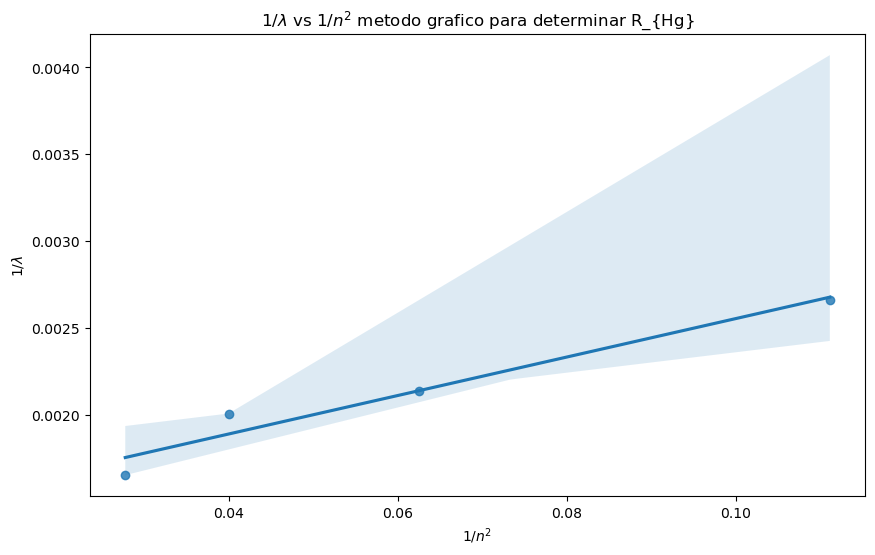

In [122]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title(r'$1/\lambda$ vs $1/n^2$ metodo grafico para determinar R_{Hg}')
sns.regplot(
    ax=ax,
    y=y, x=oon2
    )
ax.set_xlabel(r"$1/n^2$")
ax.set_ylabel(r"$1/\lambda$")
plt.show()



#plt.scatter(oon2, y)

In [133]:
from scipy import stats

slope, intercept, r, p, se = stats.linregress(oon2, y)

In [134]:
print(slope, intercept, r, p, se)

0.011072626103958438 0.0014468840820669412 0.9762775926842189 0.023722407315781128 0.0017364635368321047


In [135]:
r*r

0.9531179379772936

$b = \frac{R_{Hg}}{2^2}$

## calculando el intervalo de confianza

In [131]:
res = stats.linregress(oon2, y)

In [132]:
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))

ts = tinv(0.05, len(x)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
#slope (95%): 1.453392 +/- 0.743465
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts*res.intercept_stderr:.6f}")
#intercept (95%): 0.616950 +/- 0.544475


slope (95%): 0.011073 +/- 0.005526
intercept (95%): 0.001447 +/- 0.000377


In [128]:
slope

0.011072626103958438

# random ordering

In [31]:
# para ordenar los datos
# el algoritmo Merge sort

# divide en dos grupos
# divide en grupos
# ...
# al llegar al tamaño de 1 de grupo, toma el primer par
# si x0 < x1 entonces toma el siguiente par x1< x2,
    # else: (osea x2< x1, desorden)
    # entonces x1, x2 = x2, x1

lista = [1,2,4,2,1,4]

## por terminar
def mergesort(lista):
    N = len(lista)
    if N > 2: 
        print(lista)
        return mergesort(lista[:(N//2)]) + mergesort(lista[(N//2):])

    elif N == 2:
        if lista[0] > lista[1]:
            return [lista[1], lista[0]]
        else:
            return lista
    elif N==1:
        return lista

mergesort(lista)

[1, 2, 4, 2, 1, 4]
[1, 2, 4]
[2, 1, 4]


[1, 2, 4, 2, 1, 4]